# Excel Import

In [26]:
# !pip install numpy
# !pip install matplotlib
# !pip install eunjeon
# !pip install wordcloud

In [56]:
import csv
from dataclasses import dataclass, field, asdict, astuple
from typing import List
from collections import namedtuple
from functools import reduce
from functools import partial
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import random
import os

# import smtplib
# from email.mime.multipart import MIMEMultipart
# from email.mime.text import MIMEText

In [3]:
#################################Module For Functional Programing#############################################
curry = lambda f: lambda a,*args: f(a, *args) if (len(args)) else lambda *args: f(a, *args)

filter = curry(filter)
map = curry(map)

def _take(length, iter):
    res = []
    for a in iter:
        res.append(a)
        if len(res) == length:
            return res
        
take = curry(_take)
reduce = curry(reduce)

go = lambda *args: reduce(lambda a,f: f(a), args) ## Ìï®ÏàòÎèÑ Ï∂ïÏïΩ Í∞ÄÎä• ##
##############################################################################################################

In [4]:
def importCSV(_path):
    with open(_path,'r', encoding='UTF8') as f:
        reader  = csv.reader(f) # csvÏùò ÌñâÎ≥ÑÎ°ú ÏùΩÏñ¥Ïò¥
        res = [x for x in reader]
        
    return res

def exportCSV(_filename, _datas):
    f = open(_filename, 'w', newline='') # ÏûêÎèôÏ§ÑÎ∞îÍøà Î∞©ÏßÄ header Ïù¥ÌõÑ Ï≤´Ìñâ ÎπàÌñâ ÏÉùÏÑ± Î∞©ÏßÄ
    csv_writer = csv.writer(f)
    
    for x in _datas:
        csv_writer.writerow(x)
    f.close()

In [5]:
input_path = '20231215_all_data_ÏµúÏ¢Ö_Î©îÏùºÏÜ°Î∂ÄÏö©_ÏÇ¨Î≤à_ÎãπÏ≤®ÏûêÌè¨Ìï®.csv'

In [6]:
allDatas = importCSV(input_path)
allDatas

[['\ufeff[NLB] ÌòëÏóÖ Í∞êÏÇ¨ Î©îÏãúÏßÄ EVENT',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  'P1B1',
  'P2B4',
  '',
  '',
  '',
  'P2B5',
  'P2B6',
  'P2B8',
  '',
  '',
  'P2B9',
  'P2B10',
  'P2B11',
  'Í∏ÄÏûêÏàò',
  'Í∏ÄÏûêÏàò ÏàúÏúÑ',
  'ÌîΩ',
  '',
  '',
  ''],
 ['ÏùëÎãµÏûêID',
  'ÎãµÎ≥Ä ÌôïÏù∏ Í≥†Ïú†Î≤àÌò∏',
  'ÏãúÏûëÏùºÏãú',
  'Ï¢ÖÎ£åÏùºÏãú',
  'Ïñ¥Îñ§ ÎßàÏùåÏùÑ Ï†ÑÎã¨Ìï¥ÎìúÎ¶¥ÍπåÏöî? Ïπ¥ÎìúÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.',
  'Î≥∏Ïù∏Ïùò ÏÑ±Î™ÖÍ≥º ÏßÅÍ∏âÏùÑ ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.',
  'Î∞úÏã†Ïûê Ïù¥Î¶Ñ',
  'Î∞úÏã†Ïûê ÏÇ¨Î≤à',
  '',
  'ÌòÑÏû¨ Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.',
  'ÌòÑÏû¨ ÏÜåÏÜç ÌåÄÍ≥º Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.',
  'ÏàòÏã†Ïù∏Ïùò ÏÑ±Î™ÖÍ≥º ÏßÅÍ∏âÏùÑ ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.',
  'ÏàòÏã†Ïûê Ïù¥Î¶Ñ',
  'ÏàòÏã†Ïûê ÏÇ¨Î≤à',
  'ÏàòÏã†Ïù∏

In [7]:
headers_origin = allDatas[3]
list(enumerate(headers_origin))

[(0, 'ÏùëÎãµÏûêID'),
 (1, 'ÎãµÎ≥Ä ÌôïÏù∏ Í≥†Ïú†Î≤àÌò∏'),
 (2, 'ÏãúÏûëÏùºÏãú'),
 (3, 'Ï¢ÖÎ£åÏùºÏãú'),
 (4, 'Ïñ¥Îñ§ ÎßàÏùåÏùÑ Ï†ÑÎã¨Ìï¥ÎìúÎ¶¥ÍπåÏöî? Ïπ¥ÎìúÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.'),
 (5, 'Î≥∏Ïù∏Ïùò ÏÑ±Î™ÖÍ≥º ÏßÅÍ∏âÏùÑ ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (6, 'Î∞úÏã†Ïûê Ïù¥Î¶Ñ'),
 (7, 'Î∞úÏã†Ïûê ÏÇ¨Î≤à'),
 (8, ''),
 (9, 'ÌòÑÏû¨ Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (10, 'ÌòÑÏû¨ ÏÜåÏÜç ÌåÄÍ≥º Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (11, 'ÏàòÏã†Ïù∏Ïùò ÏÑ±Î™ÖÍ≥º ÏßÅÍ∏âÏùÑ ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (12, 'ÏàòÏã†Ïûê Ïù¥Î¶Ñ'),
 (13, 'ÏàòÏã†Ïûê ÏÇ¨Î≤à'),
 (14, 'ÏàòÏã†Ïù∏Ïùò ÌòÑÏû¨ Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (15, 'ÏàòÏã†Ïù∏Ïù¥ ÏÜçÌïú ÌåÄÍ≥º Í∑ºÎ¨¥ÏßÄÎ•º ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.'),
 (16, 'Ï†ÑÎã¨ÌïòÍ≥† Ïã∂ÏùÄ Î©îÏãúÏßÄ (Í≥†ÎßàÏõåÏöî / ÌûòÎÇ¥ÏÑ∏Ïöî / ÏàòÍ≥†ÌñàÏñ¥Ïöî)'),
 (17, 'Í∏ÄÏûêÏàò'),
 (18, 'Í∏ÄÏûêÏàò ÏàúÏúÑ'),
 (19, 'ÌîΩ'),
 (20, ''),
 (21, ''),
 (22, '')]

In [8]:
keyInform = [
    [0, 'ID'],
    [2, 'start'],
    [4, 'message_type'],
    [5, 'sender_name_position'],
    [6, 'sender_name'],
    [7, 'sender_companyID'],
    [9, 'sender_work_place'],
    [10,'sender_department'],
    [11,'receiver_name_position'],
    [12,'receiver_name'],
    [13,'receiver_companyID'],
    [14,'receiver_work_place'],
    [15,'receiver_department'],
    [16,'message_content'],
]

In [9]:
allDatas_net = allDatas[5:]
allDatas_net

[['8',
  '140-88-89538',
  '45261.55903',
  '45261.56042',
  '[IMAGE] ÌûòÎÇ¥ÏÑ∏Ïöî',
  'ÍπÄÍ∑úÌÉú Îß§ÎãàÏ†Ä',
  'ÍπÄÍ∑úÌÉú',
  'gtkim',
  '',
  'Î≥∏ÏÇ¨',
  'Ïã†ÏÑ±Ïû•Ï†ÑÎûµÌåÄ',
  'ÍπÄÏòÅÎèÑ Îß§ÎãàÏ†Ä',
  'ÍπÄÏòÅÎèÑ',
  'zerodegree',
  'Ìï¥Ïô∏ÌòÑÏû•',
  'EGAT ÌòÑÏû•',
  'Ïò§Îûú Í∏∞Í∞Ñ ÌÉÄÏßÄÏóêÏÑú Ï†ïÎßê Í≥†ÏÉùÏù¥ ÎßéÏïÑ Ï†úÎîî„Ö†„Ö†„Ö†„Ö† Ï¢ÄÎßå Îçî ÌûòÎÇ¥Í≥† Í±¥Í∞ïÌïòÍ≤å Î≥µÍ∑ÄÌï¥ÏÑú Î∞©ÌÉàÏ∂úÌïòÎü¨ Í∞ÄÏüà~~~!!',
  '60',
  '258',
  '',
  'ÎØ∏ÎùºÌÅ¥Î™®Îãù1',
  '',
  ''],
 ['10',
  '327-09-77452',
  '45264.78542',
  '45264.78958',
  '[IMAGE] ÌûòÎÇ¥ÏÑ∏Ïöî',
  'ÍπÄÏÑ±ÌòÑ Ï±ÖÏûÑÎß§ÎãàÏ†Ä',
  'ÍπÄÏÑ±ÌòÑ',
  'shgaga',
  '',
  'Ìï¥Ïô∏ÌòÑÏû•',
  'ÌîåÎûúÌä∏ÏàòÌñâ2ÌåÄ / ÌÉúÍµ≠ TUCF ÌòÑÏû•',
  'ÏúÑÌòïÍ∂å Îß§ÎãàÏ†Ä',
  'ÏúÑÌòïÍ∂å',
  'winwin',
  'Íµ≠ÎÇ¥ÌòÑÏû•',
  'ÌîåÎûúÌä∏ÏàòÌñâ2ÌåÄ / ÎãπÏßÑ LECO ÌòÑÏû•',
  'ÌòïÍ∂åÏïÑ Ïò¨Ìï¥ÎèÑ Í≥†ÏÉù ÎßéÏïòÎã§!!\nÏßÑÍ∏âÍ≥º Ìï®Íªò Îî∞ÎúªÌïú Ïó∞ÎßêÏù¥ ÎêòÏóàÏùå Ï¢ãÍ≤†Îã§üôè',
  '41',
  '383',
  '',
  'ÎØ∏ÎùºÌÅ¥Î™®Îãù2',
  '',
  ''],
 ['13',
  '536-64-59947',
  '

In [10]:
def make_messageDict(oneRow, keyInform):
    keys = list(map(lambda x: x[1], keyInform))
    vals = list(map(lambda x: oneRow[x[0]], keyInform))
    
    return dict(zip(keys,vals))

make_messageDict(allDatas_net[0], keyInform)

{'ID': '8',
 'start': '45261.55903',
 'message_type': '[IMAGE] ÌûòÎÇ¥ÏÑ∏Ïöî',
 'sender_name_position': 'ÍπÄÍ∑úÌÉú Îß§ÎãàÏ†Ä',
 'sender_name': 'ÍπÄÍ∑úÌÉú',
 'sender_companyID': 'gtkim',
 'sender_work_place': 'Î≥∏ÏÇ¨',
 'sender_department': 'Ïã†ÏÑ±Ïû•Ï†ÑÎûµÌåÄ',
 'receiver_name_position': 'ÍπÄÏòÅÎèÑ Îß§ÎãàÏ†Ä',
 'receiver_name': 'ÍπÄÏòÅÎèÑ',
 'receiver_companyID': 'zerodegree',
 'receiver_work_place': 'Ìï¥Ïô∏ÌòÑÏû•',
 'receiver_department': 'EGAT ÌòÑÏû•',
 'message_content': 'Ïò§Îûú Í∏∞Í∞Ñ ÌÉÄÏßÄÏóêÏÑú Ï†ïÎßê Í≥†ÏÉùÏù¥ ÎßéÏïÑ Ï†úÎîî„Ö†„Ö†„Ö†„Ö† Ï¢ÄÎßå Îçî ÌûòÎÇ¥Í≥† Í±¥Í∞ïÌïòÍ≤å Î≥µÍ∑ÄÌï¥ÏÑú Î∞©ÌÉàÏ∂úÌïòÎü¨ Í∞ÄÏüà~~~!!'}

In [11]:
allMsgDicts = list(map(lambda x: make_messageDict(x, keyInform), allDatas_net))
allMsgDicts

[{'ID': '8',
  'start': '45261.55903',
  'message_type': '[IMAGE] ÌûòÎÇ¥ÏÑ∏Ïöî',
  'sender_name_position': 'ÍπÄÍ∑úÌÉú Îß§ÎãàÏ†Ä',
  'sender_name': 'ÍπÄÍ∑úÌÉú',
  'sender_companyID': 'gtkim',
  'sender_work_place': 'Î≥∏ÏÇ¨',
  'sender_department': 'Ïã†ÏÑ±Ïû•Ï†ÑÎûµÌåÄ',
  'receiver_name_position': 'ÍπÄÏòÅÎèÑ Îß§ÎãàÏ†Ä',
  'receiver_name': 'ÍπÄÏòÅÎèÑ',
  'receiver_companyID': 'zerodegree',
  'receiver_work_place': 'Ìï¥Ïô∏ÌòÑÏû•',
  'receiver_department': 'EGAT ÌòÑÏû•',
  'message_content': 'Ïò§Îûú Í∏∞Í∞Ñ ÌÉÄÏßÄÏóêÏÑú Ï†ïÎßê Í≥†ÏÉùÏù¥ ÎßéÏïÑ Ï†úÎîî„Ö†„Ö†„Ö†„Ö† Ï¢ÄÎßå Îçî ÌûòÎÇ¥Í≥† Í±¥Í∞ïÌïòÍ≤å Î≥µÍ∑ÄÌï¥ÏÑú Î∞©ÌÉàÏ∂úÌïòÎü¨ Í∞ÄÏüà~~~!!'},
 {'ID': '10',
  'start': '45264.78542',
  'message_type': '[IMAGE] ÌûòÎÇ¥ÏÑ∏Ïöî',
  'sender_name_position': 'ÍπÄÏÑ±ÌòÑ Ï±ÖÏûÑÎß§ÎãàÏ†Ä',
  'sender_name': 'ÍπÄÏÑ±ÌòÑ',
  'sender_companyID': 'shgaga',
  'sender_work_place': 'Ìï¥Ïô∏ÌòÑÏû•',
  'sender_department': 'ÌîåÎûúÌä∏ÏàòÌñâ2ÌåÄ / ÌÉúÍµ≠ TUCF ÌòÑÏû•',
  'receiver_name_position': 'ÏúÑÌòïÍ∂å Îß§ÎãàÏ†Ä',
  '

In [12]:
# !pip install eunjeon

In [13]:
from eunjeon import Mecab

In [14]:
locations = set(list(map(lambda x: x['sender_work_place'], allMsgDicts)))
locations

{'Íµ≠ÎÇ¥ÌòÑÏû•', 'Î≥∏ÏÇ¨', 'ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå', 'Ìï¥Ïô∏ÌòÑÏû•'}

In [15]:
thnks = lambda _list: go\
(_list,
 filter(lambda x: 'Í≥†ÎßàÏõåÏöî' in x['message_type']),
 list,
 len,
)

cheers = lambda _list: go\
(_list,
 filter(lambda x: 'ÌûòÎÇ¥ÏÑ∏Ïöî' in x['message_type']),
 list,
 len,
)

goodjob = lambda _list: go\
(_list,
 filter(lambda x: 'ÏàòÍ≥†ÌñàÏñ¥Ïöî' in x['message_type']),
 list,
 len,
)

type_res = {
    'Í≥†ÎßàÏõåÏöî': thnks(allMsgDicts), 
    'ÌûòÎÇ¥ÏÑ∏Ïöî': cheers(allMsgDicts), 
    'ÏàòÍ≥†ÌñàÏñ¥Ïöî': goodjob(allMsgDicts),
}

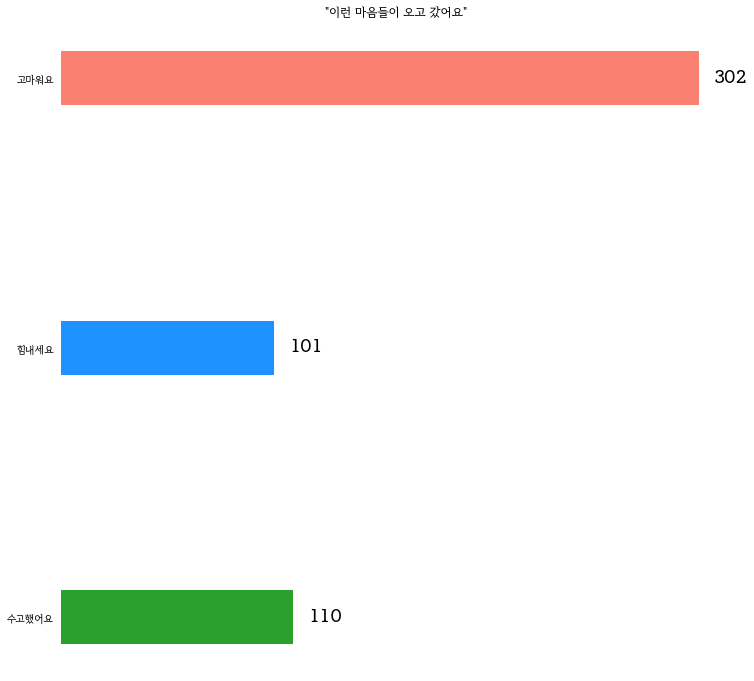

In [16]:
import numpy as np
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/RIDIBatang_0.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/168 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]

y_pos = np.arange(len(type_res))
plt.figure(figsize=(12,12))
# plt.barh(y_pos, res.values())
plt.title('"Ïù¥Îü∞ ÎßàÏùåÎì§Ïù¥ Ïò§Í≥† Í∞îÏñ¥Ïöî"')
plt.yticks(y_pos, type_res.keys())
plt.gca().invert_yaxis()
bar = plt.barh(y_pos, type_res.values(), height=0.2, color=['salmon', 'dodgerblue', 'C2'])

# Ïà´Ïûê ÎÑ£Îäî Î∂ÄÎ∂Ñ
for rect in bar:
    width = rect.get_width()
    plt.text(width+15, rect.get_y() + rect.get_height()/1.5, '%1.f' % width, ha='center', va='bottom', size = 20)

plt.rc('font', family=font_name, size=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()


In [17]:
def from_to_analysis(f,t,_list):
    resf = lambda _list: go\
    (_list,
     filter(lambda x: x['sender_work_place']==f),
     filter(lambda x: x['receiver_work_place']==t),
     list,
     len,
    )
    return resf(_list)


In [18]:
res = {}
for f in locations:
    for t in locations:
        res[f'{f} to {t}  '] = from_to_analysis(f,t,allMsgDicts)
        
res

{'ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå to ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå  ': 5,
 'ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå to Î≥∏ÏÇ¨  ': 11,
 'ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå to Ìï¥Ïô∏ÌòÑÏû•  ': 3,
 'ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå to Íµ≠ÎÇ¥ÌòÑÏû•  ': 0,
 'Î≥∏ÏÇ¨ to ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå  ': 25,
 'Î≥∏ÏÇ¨ to Î≥∏ÏÇ¨  ': 270,
 'Î≥∏ÏÇ¨ to Ìï¥Ïô∏ÌòÑÏû•  ': 47,
 'Î≥∏ÏÇ¨ to Íµ≠ÎÇ¥ÌòÑÏû•  ': 10,
 'Ìï¥Ïô∏ÌòÑÏû• to ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå  ': 1,
 'Ìï¥Ïô∏ÌòÑÏû• to Î≥∏ÏÇ¨  ': 12,
 'Ìï¥Ïô∏ÌòÑÏû• to Ìï¥Ïô∏ÌòÑÏû•  ': 19,
 'Ìï¥Ïô∏ÌòÑÏû• to Íµ≠ÎÇ¥ÌòÑÏû•  ': 5,
 'Íµ≠ÎÇ¥ÌòÑÏû• to ÏÑúÏö∏ÏÇ¨Î¨¥ÏÜå  ': 0,
 'Íµ≠ÎÇ¥ÌòÑÏû• to Î≥∏ÏÇ¨  ': 26,
 'Íµ≠ÎÇ¥ÌòÑÏû• to Ìï¥Ïô∏ÌòÑÏû•  ': 3,
 'Íµ≠ÎÇ¥ÌòÑÏû• to Íµ≠ÎÇ¥ÌòÑÏû•  ': 76}

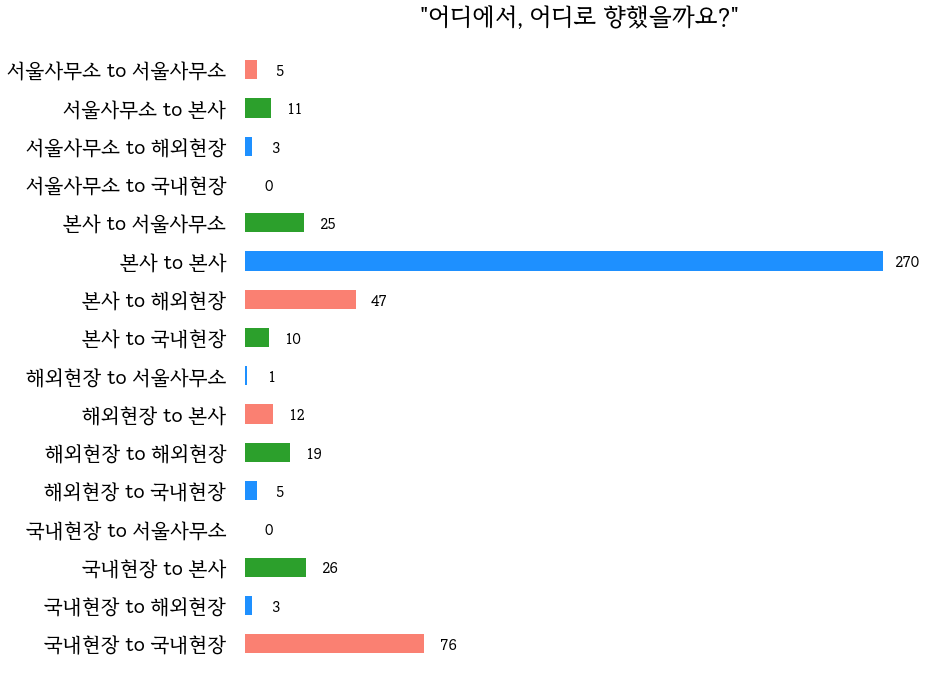

In [19]:
import numpy as np
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/RIDIBatang_0.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/168 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]
colors = ['salmon','C2','dodgerblue']

y_pos = np.arange(len(res))
plt.figure(figsize=(12,12))
# plt.barh(y_pos, res.values())
plt.title('"Ïñ¥ÎîîÏóêÏÑú, Ïñ¥ÎîîÎ°ú Ìñ•ÌñàÏùÑÍπåÏöî?"')
plt.yticks(y_pos, res.keys())
plt.gca().invert_yaxis()
bar = plt.barh(y_pos, res.values(), height=0.5, color=colors)

# Ïà´Ïûê ÎÑ£Îäî Î∂ÄÎ∂Ñ
for rect in bar:
    width = rect.get_width()
    plt.text(width+10, rect.get_y() + rect.get_height(), '%1.f' % width, ha='center', va='bottom', size = 15)

plt.rc('font', family=font_name, size=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()

In [70]:
from eunjeon import Mecab
stop_words = "Ï†Ñ ÎÇú Ïùº Í±∏ Î≠ê Ï§Ñ Îßå Í±¥ Î∂Ñ Í∞ú ÎÅù Ïûº Ïù¥Í±∞ Î≤à Ï§ë ÎìØ Îïå Í≤å ÎÇ¥ Îßê ÎÇò Ïàò Í±∞ Ï†ê Í≤É Ìïú ÎÖÑ Ìï¥ Ï†Ä ÎèôÏïà Ï±ÖÏûÑ Ïïû ÏßúÏ¶ù Îß§ÎãàÏ†Ä"
stop_words = stop_words.split()

In [71]:
tagger = Mecab()

nouns = []

for i in allMsgDicts:
    msgContents = i['message_content']
    for noun in tagger.nouns(msgContents):
        if noun not in stop_words:
            nouns.append(noun)

nouns

['Í∏∞Í∞Ñ',
 'ÌÉÄÏßÄ',
 'Í≥†ÏÉù',
 'Ï†ú',
 'Îîî',
 'Í±¥Í∞ï',
 'Î≥µÍ∑Ä',
 'Î∞©',
 'ÌÉàÏ∂ú',
 'Ìòï',
 'Ïò¨Ìï¥',
 'Í≥†ÏÉù',
 'ÏßÑÍ∏â',
 'Ïó∞Îßê',
 'Í∂å',
 'ÎåÄÎ¶¨',
 'ÌåÄ',
 'ÏñºÍµ¥',
 'Í≥†Ïñë',
 'Í≥†ÏÉù',
 'Î≥∏Ïù∏',
 'ÏóÖÎ¨¥',
 'ÏóÖÎ¨¥',
 'Í≥†ÏÉù',
 'Îπõ',
 'ÏÉùÍ∞Å',
 'ÏùëÏõê',
 'ÏãúÍ∞Ñ',
 'ÏÜåÏÜç',
 'ÏñºÍµ¥',
 'Ïõî',
 'Í∑∏Îïå',
 'Í∑∏ÎèôÏïà',
 'ÌöåÌè¨',
 'Í≥†ÏÉù',
 'Ïó∞ÎùΩ',
 'ÏùëÏõê',
 'Í≥†ÎØº',
 'ÏùòÎÖº',
 'ÎèôÎ£å',
 'ÎÇ¥ÎÖÑ',
 'Î™©Ìëú',
 'Îã¨ÏÑ±',
 'ÏùëÏõê',
 'Ïù¥ÏòÅÌù¨',
 'ÏûÖÏÇ¨',
 'Ï≤òÏùå',
 'ÌòÑÏû¨',
 'ÎØøÏùå',
 'ÎßàÏùå',
 'Ï£ºÏã¨',
 'ÌèâÏÉù',
 'Í∞êÏÇ¨',
 'Í±¥Í∞ï',
 'Í∞ÄÏ†ï',
 'ÌñâÎ≥µ',
 'Ï∂ïÎ≥µ',
 'Í∏∞Ïõê',
 'Í∞êÏÇ¨',
 'Í∞êÏÇ¨',
 'ÌÅ¨Î¶¨Ïä§ÎßàÏä§',
 'Î∂ÑÏúÑÍ∏∞',
 'Ï§ÄÎπÑ',
 'ÎØºÏßÄ',
 'ÎçïÎ∂Ñ',
 'ÎπÑÏã§',
 'ÎÇ¥ÏÉâ',
 'Î≥∏Î∂Ä',
 'Í≥≥',
 'ÏÇ¨Îûå',
 'ÎèÑÏõÄ',
 'ÎïåÎ¨∏',
 'ÏÉùÍ∞Å',
 'ÎèÑÏõÄ',
 'ÎØºÏßÄ',
 'ÏÉùÍ∞Å',
 'Ï£ºÎ≥Ä',
 'ÏÇ¨Îûå',
 'ÎØºÏßÄ',
 'Î¨¥Ïóá',
 'ÎÑà',
 'Ïä§Ïä§Î°ú',
 'ÏµúÏö∞ÏÑ†',
 'ÎÇ¥ÎÖÑ',
 'ÌñâÎ≥µ',
 'ÏàòÍ≥†',
 'Í∞êÏÇ¨',
 'ÍπÄÏÉÅÌò∏',
 'ÌòÑÏû•',
 'Í∑ºÎ¨¥',
 'Í∞êÏûê',
 '

In [39]:
from wordcloud import WordCloud
# from konlpy.tag import Twitter
from collections import Counter

In [69]:
from wordcloud import WordCloud

texts = ['Ïù¥Í≤É ÏùÄ ÏòàÎ¨∏ ÏûÖÎãàÎã§', 'Ïó¨Îü¨Î∂Ñ Ïùò Î¨∏Ïû•ÏùÑ ÎÑ£ ÏúºÏÑ∏Ïöî']
keywords = {'Ïù¥Í≤É':5, 'ÏòàÎ¨∏':3, 'Îã®Ïñ¥':5, 'ÎπàÎèÑÏàò':3}

wordcloud = WordCloud(
    font_path='./font/ridibatang.ttf',
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_text(texts)
wordcloud = wordcloud.generate_from_frequencies(keywords)

TypeError: expected string or bytes-like object

In [57]:
os.path

<module 'ntpath' from 'c:\\Users\\HEC\\AppData\\Local\\Programs\\Python\\Python39\\lib\\ntpath.py'>

In [64]:
word_count = 30

counts = Counter(nouns)
tags = counts.most_common(word_count)
print(dict(tags))
wc = WordCloud(font_path = 'C:/Users/HEC/AppData/Local/Programs/Python/Python39/ridibatang.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
# plt.figure(figsize=(10,8))
# plt.axis('off')
# plt.imshow(cloud)
# plt.show()

{'Í∞êÏÇ¨': 381, 'ÎÇ¥ÎÖÑ': 134, 'Í±¥Í∞ï': 124, 'ÎèÑÏõÄ': 120, 'ÌñâÎ≥µ': 117, 'ÏàòÍ≥†': 116, 'Í≥†ÏÉù': 112, 'Î∂ÄÌÉÅ': 93, 'Ïó∞Îßê': 81, 'ÌòÑÏû•': 76, 'Îß§ÎãàÏ†Ä': 76, 'ÏóÖÎ¨¥': 75, 'Î™®Ïäµ': 64, 'ÏôÄÏ§ë': 61, 'ÏÉàÌï¥': 55, 'Í∏∞Ïõê': 50, 'ÌåÄ': 48, 'ÎßàÎ¨¥Î¶¨': 45, 'ÏÉùÍ∞Å': 42, 'ÎçïÎ∂Ñ': 39, 'Ïò¨Ìï¥': 38, 'Í∞ÄÏ†ï': 37, 'ÏõÉÏùå': 34, 'ÏùÄÌòú': 34, 'ÌÖêÎç∞': 29, 'ÏßÑÏã¨': 28, 'ÎßàÏùå': 27, 'ÌöåÏÇ¨': 25, 'ÌåÄÏû•': 25, 'Ïö∞Î¶¨': 25}


ValueError: Only supported for TrueType fonts

In [28]:
# from collections import Counter
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(10))
top_nouns

{'Í∞êÏÇ¨': 381,
 'ÎÇ¥ÎÖÑ': 134,
 'Í±¥Í∞ï': 124,
 'ÎèÑÏõÄ': 120,
 'ÌñâÎ≥µ': 117,
 'ÏàòÍ≥†': 116,
 'Í≥†ÏÉù': 112,
 'Î∂ÄÌÉÅ': 93,
 'Ïó∞Îßê': 81,
 'ÌòÑÏû•': 76}

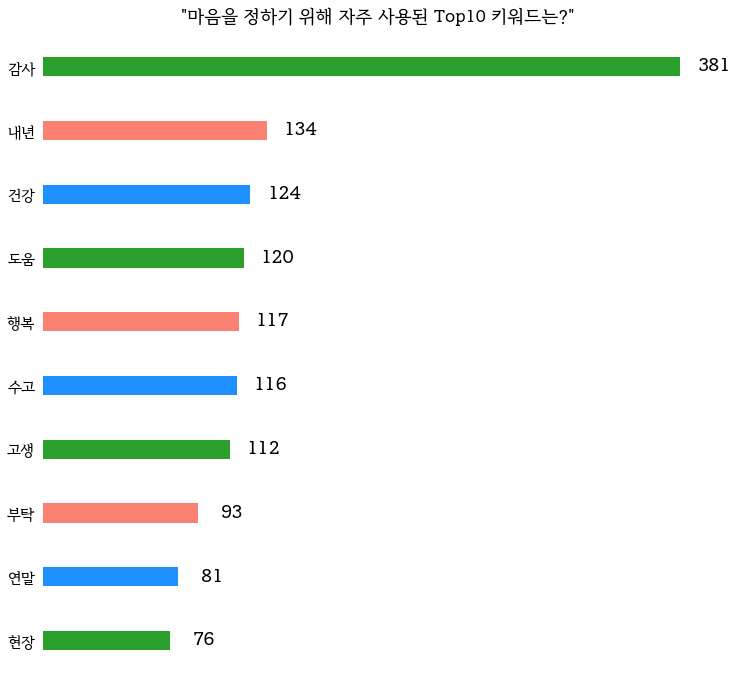

In [23]:
import numpy as np
# font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/Eulyoo1945-SemiBold.otf'
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/RIDIBatang_0.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
# Ï∂úÏ≤ò: https://giveme-happyending.tistory.com/168 [ÏÜåÏó∞Ïùò_Í∞úÎ∞úÏùºÏßÄ:Ìã∞Ïä§ÌÜ†Î¶¨]
colors = ['C2','salmon','dodgerblue', ]

y_pos = np.arange(len(top_nouns))
plt.figure(figsize=(12,12))
bar = plt.barh(y_pos, top_nouns.values(), height=0.3, color=colors)
plt.title('"ÎßàÏùåÏùÑ Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏûêÏ£º ÏÇ¨Ïö©Îêú Top10 ÌÇ§ÏõåÎìúÎäî?"')
plt.yticks(y_pos, top_nouns.keys())
plt.gca().invert_yaxis()

# Ïà´Ïûê ÎÑ£Îäî Î∂ÄÎ∂Ñ
for rect in bar:
    width = rect.get_width()
    plt.text(width+20, rect.get_y() + rect.get_height(), '%1.f' % width, ha='center', va='bottom', size = 20)
    
plt.rc('font', family=font_name, size=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()
